# Seventh assignment
The assignment provides problems regarding basic applications of linear algebra and machine learning. Use this notebook to perform the computations and insert your comments into it. All the coding must be done in Python 3. 

The assignment has to be submitted individually!

All your plots have to be labelled properly!  (Non-labeled plots will result in point deductions!)

**Non running cells/tasks will not be considered!**

The tasks/questions are 1.1), 1.2), 1.3), 1.4), 1.5), 2.1), 2.2), 2.3), 2.4), 3.1), 3.2), 3.3) and 3.4). After each task description there is an answer cell for your code or text. For coding tasks they look like this:

```
# YOUR CODE HERE
```
(You can delete the "YOUR CODE HERE" comment, if you like.)

For markdown (text) cells the response cell will include this:

**WRITE YOUR ANSWER HERE**

Sometimes they are followed by test cells. You can run the test cells after you finished the task. If these cells don't show any errors, your answer is right. You can't/shouldn't edit test cells!

After you finished the notebook you can hit the "Validate" button on the top of the notebook to see if all test are good. You can also use the "Validate" button on the "Assignment" tap on the main page of python.ldv.ei.tum.de. Some tasks will be graded manually (e.g. plots, text answers). They don't have a following test cell. 

Please make sure to hit the "Submit" button on the "Assignment" tab on the main page of python.ldv.ei.tum.de before the deadline passes. You will get your final score after the deadline.

**Some tips:**
- Only change cells with `# YOUR CODE HERE` or **WRITE YOUR ANSWER HERE**
- Do not change cell types or the notebook name.
- Do not add other .ipynb files into the ami22 folder or subfolders.
- Do not override the original files in the ami22 folder or subfolders.
- For every plot makes sure that axes are correctly labeled with original labels and not encoded ones. 
- If you are asked to provide multiple plots, make sure that the titles are clear. A plot should be self explanatory, we should not have to look at your code to know what is plotted. 

#### Date of submission: June 28, 2022, 23:55 hrs

In [1]:
import numpy as np
import scipy.signal as sig
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions, preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import utils
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from PIL import Image
import matplotlib.pyplot as plt

In the first part you will be using the famous CIFAR-10 dataset. The dataset consists of 32 by 32 RGB images of 10 different classes. You can assume it being the small sister of ImageNet. We will sketch how you could run a gridsearch using sklearn together with keras. Due to the limited compute capabilites, we will use the training set only and define our own split. 

In [2]:
(X, y), (_,_) = cifar10.load_data() #due to the limited computing 
#capacity we take the training samples only and do our own split

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.5, random_state=42)

# convert the images to floats between 0 and 1
X_train,X_test = X_train.astype('float32')/255, X_test.astype('float32')/255
# convert the labels to one-hot encoding
(y_train, y_test)=  utils.to_categorical(y_train,10), utils.to_categorical(y_test,10)
# mean center the images
X_train_mean = np.expand_dims(X_train.mean(axis=0),axis=0)
X_train = X_train-X_train_mean
X_test = X_test-X_train_mean

In [3]:
# Creating the model
def create_cnn_model(n_filters=(32,32), kernel_sizes=((5,5),(3,3)), activations=('relu','relu'), randseed=42):
    tf.random.set_seed(randseed)
    cnn_model = tf.keras.models.Sequential([
    Conv2D(n_filters[0], kernel_sizes[0], activation=activations[0], input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(n_filters[1], kernel_sizes[1], activation=activations[1]),
    Flatten(),
    Dense(10, activation='softmax')
    ],
    name="CNN"
    )
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #cnn_model.summary()
    return cnn_model

model = create_cnn_model()

2022-06-27 20:24:59.589467: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Task 1.1**

a) Set up an `EarlyStopping()` callback to monitor the validation loss. Set the `mode=min`, a patience of 3 epochs and make sure the best weights will be restored. Use a verbosity level of 1 and store the callback function to the variable `es`! 

b) Set up a `KerasClassifier()` with `create_cnn_model` as build function. Set the following parameters:
- `validation_split=.25`
- `epochs=25`
- `batch_size=128`
- `verbose=0`
Store the Classifier to the variable `cnn`!

c) Define a dict `param_grid` to test the number of filters `(16,16)` and `(16,32)` as well as the kernel sizes of `(3,3),(3,3)` and `(3,3),(5,5)`!

Finally use the provided code to run the grid search. This can take a few minutes.

In [4]:
# YOUR CODE HERE
#es = [EarlyStopping( mode='min', verbose=1, patience=3, restore_best_weights=True)]
#cnn = KerasClassifier(build_fn=create_cnn_model, validation_split=.25, epochs=25, batch_size=128, verbose=0)
#param_grid = {'n_filters':[(16,16),(16,32)], 'kernel_sizes':[((3,3),(3,3)),((3,3),(5,5))]}

#grid1 = GridSearchCV(estimator=cnn, param_grid=param_grid,cv=2,verbose=2)
#grid1.fit(X_train[::20],y_train[::20],callbacks=es)
#grid1.cv_results_

**Task 1.2**

Compute the final score on the test set using the *best_estimator* from the gridsearch and the `score()` method!

In [5]:
# YOUR CODE HERE
#final_score1= grid1.score(X_test[::40],y_test[::40])

#final_score1= grid1.score(X_test,y_test)
#print(final_score1)

**Task 1.3**

Now we will focus on another "parameter" of the model. You do not have to repeat the definition of the `EarlyStopping()` and the `KerasClassifier`, we will just re-use and re-tune it. Create a **new** parameter grid called `param_grid2` which contains only the `randseed`. Set the values to run the gridsearch to 3,17 and 42!

Finally use the provided code to run the grid search. This can take a few minutes.

In [6]:
# YOUR CODE HERE
#param_grid2 = {'randseed':[3,17,42]}


#grid2 = GridSearchCV(estimator=cnn, param_grid=param_grid2,cv=2,verbose=2)
#grid2.fit(X_train,y_train,callbacks=es)
#grid2.cv_results_

**Task 1.4**

Compute the final score on the test set using the *best_estimator* from the gridsearch and the `score()` method and save it to the variable `final_score2`!

In [7]:
# YOUR CODE HERE

#final_score2= grid2.score(X_test[::40],y_test[::40])

#final_score2= grid2.score(X_test,y_test)
#print(final_score2)

**Task 1.5**

Which of the following statements is true?

'a': The random state/seed is a hyper-parameter and we should find the optimal seed.

'b': Tuning the random state/seed is a questionable (reasearch) practice.

'c': Repeating experiments instead of using a single random state/seed is a questionable (research) practice.

'd': There is no randomness in the CNN defined and used in the tasks above.

*Use a variable* `x15` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x15='e'`. *There is only one correct answer.*

In [8]:
# YOUR CODE HERE
x15='c'
print('The answer is ' + x15 + '.')

The answer is c.


In the remaing part of the notebook we will work with a pre-trained model. Due to storage and compute capabilites we will not use famous networks like ResNet50, but the light-weight MobileNetV2.

**Task 2.1**


Write a function `resize_to_244by244()` to change the shape of an image (represented as a tensorflow-tensor). The *MobileNetV2* requires input images with a size of $224 \times224$. Since not all images are square, there are several ways to resize a generally rectangular image to a square format. 
Implement the following methods:
1. *Simple resize*, ignoring the aspect ratio: `mode='resize'`
2. *Zero-padding*, maintaining the aspect ratio by zero padding: `mode='pad'` 
3. *Resize and central crop*, resizing maintaining the aspect ratio followed by cropping an square part of a non-square resized image: `mode='crop'`

*Hint: You might use tensorflow functions.*
[<img src="resize_demo.png" width="700"/>](resize_demo.png)

In [9]:
def resize_to_244by244(im_tf, mode):
    '''
    inputs: im_if, type: tensorflow-tensor
            mode, type: string
    outputs: im_tf, type: tensorflow-tensor        
    '''
    # YOUR CODE HERE
    if  mode=='resize':
        im_tf = tf.image.resize(images=im_tf, size=[224,224])
    elif mode=='pad':
        im_tf = tf.image.resize_with_pad(image=im_tf, target_height=224, target_width=224)
    elif mode=='crop':
        im_tf = tf.image.resize_with_crop_or_pad(image=im_tf,  target_height=224, target_width=224)
        im_tf = tf.cast(im_tf, tf.float32)
    return im_tf

In [10]:
def jpg_file_to_mobilenet(filename=None, show=True, mode='resize'):
    im_pil = Image.open(filename)
    im_tf = img_to_array(im_pil).astype('uint8')  
    im_tf = tf.convert_to_tensor(im_tf)
    if show:
        #print('Original - Shape:', tf.shape(im_tf), ' -- NumpyType:', im_tf.numpy().dtype, ' -- Range: ', im_tf.numpy().min(), im_tf.numpy().max())
        f,a = plt.subplots(1,3,figsize=(10,5))
        f.suptitle(filename,y=.85)
        a[0].imshow(im_tf)
        a[0].set_title('Original')
    im_tf = resize_to_244by244(im_tf,mode)
    if show:
        #print('Resize - Shape:', tf.shape(im_tf), ' -- NumpyType:', im_tf.numpy().dtype, ' -- Range: ', im_tf.numpy().min(), im_tf.numpy().max())
        a[1].imshow(im_tf/255)
        a[1].set_title('Resized')
    im_tf = preprocess_input(im_tf)
    if show:
        #print('MobileNetPreporcessing - Shape:', tf.shape(im_tf), ' -- NumpyType:', im_tf.numpy().dtype, ' -- Range: ', im_tf.numpy().min(), im_tf.numpy().max())
        a[2].imshow(im_tf*0.5 + 0.5)
        a[2].set_title('MobileNetPreporcessing')
        f.tight_layout()
    im_tf = im_tf[None, ...]
    return im_tf

Keras/Tensorflow serves some prominent CNN-architectures for image recognition, like *ResNet*, *VGG* and many more. Due to its small footprint we will be using the *MobileNet v2*.

**Task 2.2**


Set up a `MobileNetV2()`-Keras model `mnv2`, pre-trained on the *ImageNet* dataset. 

In [11]:
# YOUR CODE HERE
mnv2 = MobileNetV2( weights='imagenet' )

**Task 2.3**

Use the function `jpg_file_to_mobilenet()` (making use of your resize function from task 2.1) to load the provided image by providing the filename and the resize mode.
Predict the output for this image and print the top-3 softmax-output values and the 3 associated classes using Keras' applications `decode_predictions()` function. Store the output of the function to the variable `out`.

2022-06-27 20:25:00.543992: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-27 20:25:00.561449: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2799950000 Hz


[('n01751748', 'sea_snake', 0.94750255), ('n01740131', 'night_snake', 0.0047717947), ('n01734418', 'king_snake', 0.0025826946)]
[('n01751748', 'sea_snake', 0.9205842), ('n01740131', 'night_snake', 0.009279239), ('n01734418', 'king_snake', 0.0021393416)]
[('n01751748', 'sea_snake', 0.88800335), ('n01740131', 'night_snake', 0.017308183), ('n01734418', 'king_snake', 0.011788778)]
---
[('n01751748', 'sea_snake', 0.5923796), ('n01734418', 'king_snake', 0.26769227), ('n01740131', 'night_snake', 0.04514568)]
[('n02219486', 'ant', 0.43364593), ('n01742172', 'boa_constrictor', 0.08631768), ('n01770393', 'scorpion', 0.062819555)]
[('n01734418', 'king_snake', 0.4550483), ('n01751748', 'sea_snake', 0.19777228), ('n01740131', 'night_snake', 0.068637446)]
---
[('n01751748', 'sea_snake', 0.4861799), ('n01734418', 'king_snake', 0.29629502), ('n01740131', 'night_snake', 0.03938378)]
[('n01751748', 'sea_snake', 0.90836775), ('n01740131', 'night_snake', 0.022467999), ('n01734418', 'king_snake', 0.0157264

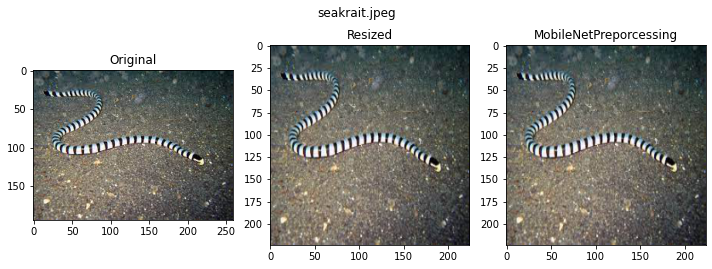

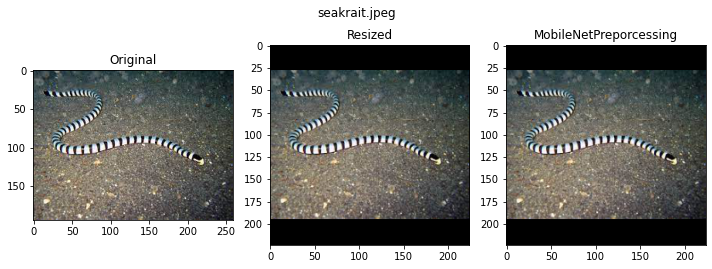

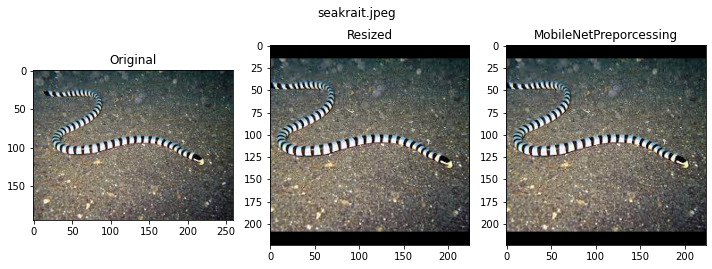

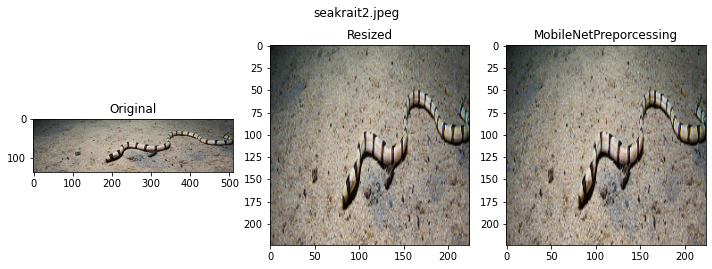

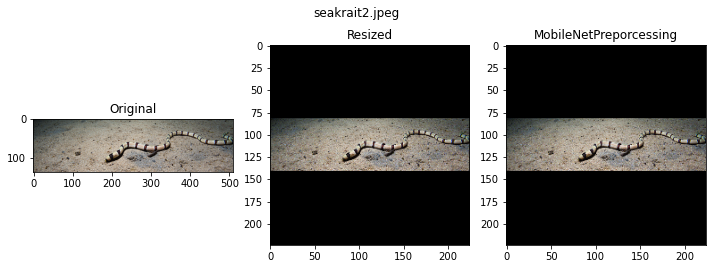

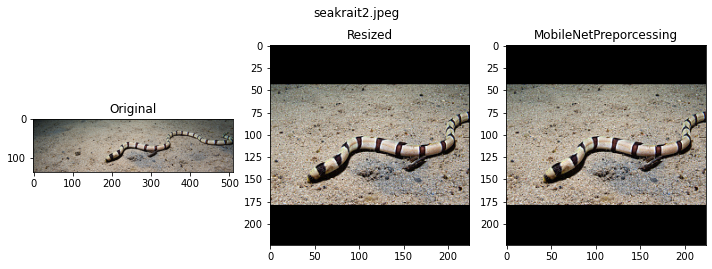

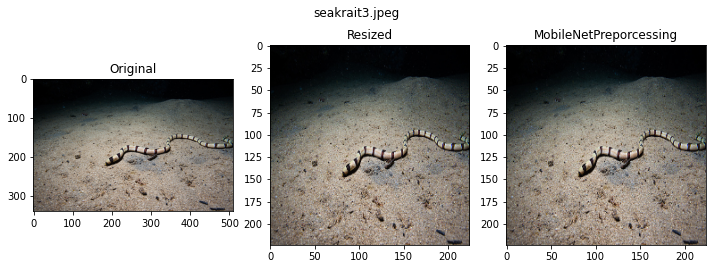

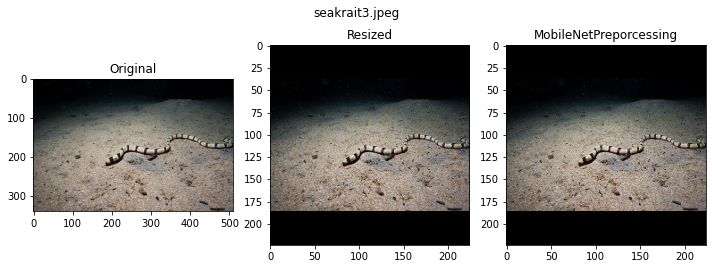

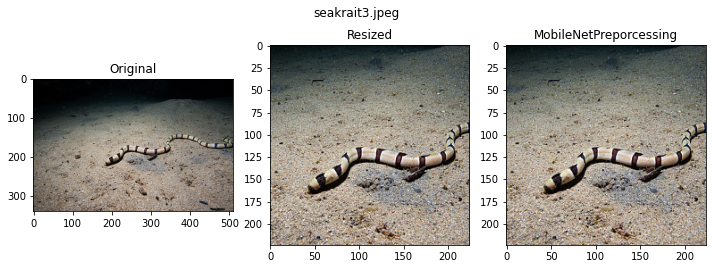

In [12]:
filenames = ['seakrait.jpeg', 'seakrait2.jpeg', 'seakrait3.jpeg']
modes = ['resize','pad','crop']
for filename in filenames:
    for mode in modes:
        # YOUR CODE HERE
        im_tf = jpg_file_to_mobilenet(filename=filename, mode=mode)
        pred = mnv2.predict(im_tf)
        out = decode_predictions(pred, top=3)
        print(*out, sep='\n')
    print('---')

**Task 2.4**

The black areas due to the zero padding can have an influence on the prediction. 
Which of the following padding methods might provide a more natural looking solution?

'a': reflect: use the pixel intensities of the vector mirrored on the first and last values of the vector along each axis.
    
'b': median: use the median pixel intensities for padded pixels.
    
'c': edge/repeat: use the pixel intensities of the edge pixels for padded pixels.
        
'd': random: use uniformly distributed random values for the padded pixels.

*Use a variable* `x24` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x24='e'`. *There is only one correct answer.*

In [13]:
# YOUR CODE HERE
x24='a'
print('The answer is ' + x24 + '.')

The answer is a.


After having a glimpse how resizing can affect the perfromance, we will now check out how slight perturbations can harm the accuracy.

**Task 3.1**

Using the code snippet below, load the three different images of a trike using the function `jpg_file_to_mobilenet()` with `mode='resize'`. Call the predict method of the pre-trained MobileNet Model `mnv2` and store the top-3 results of `decode_predictions()` output in the variable `out2`.

[('n04482393', 'tricycle', 0.99550074), ('n03785016', 'moped', 0.0007453179), ('n03649909', 'lawn_mower', 0.00060268503)]
---
[('n03649909', 'lawn_mower', 0.36374038), ('n03496892', 'harvester', 0.1039362), ('n04465501', 'tractor', 0.06480411)]
---
[('n04482393', 'tricycle', 0.9953159), ('n03649909', 'lawn_mower', 0.00068539253), ('n03785016', 'moped', 0.0006820706)]
---


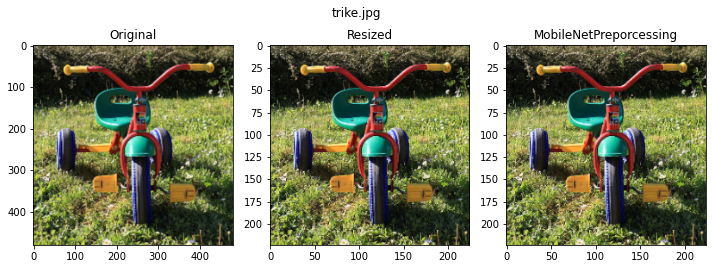

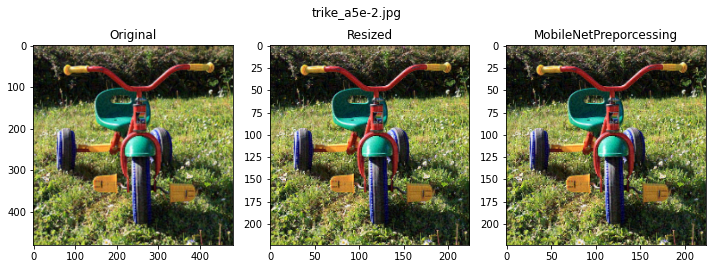

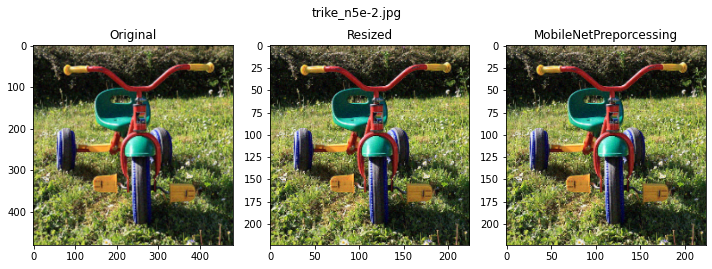

In [14]:
filenames = ['trike.jpg', 'trike_a5e-2.jpg', 'trike_n5e-2.jpg']
for filename in filenames:
    # YOUR CODE HERE
    im_tf = jpg_file_to_mobilenet(filename=filename, mode='resize')
    pred = mnv2.predict(im_tf)
    out2 = decode_predictions(pred, top=3)
    print(*out2, sep='\n')
    print('---')

**Task 3.2**

The results of the above experiment should have made you wonder. Therefore, you should take a closer look at the disturbances in the image. Calculate the difference images `di1` by subtracting *trike_a5e-2.jpg* from *trike.jpg* and `di2` by subtracting *trike_n5e-2.jpg* from *trike.jpg*! Use the `jpg_file_to_mobilenet()` once again to read and resize the images (set `show=False` to not repeatedly show all the images).

Text(0.5, 1.0, 'trike-trike_n5e-2')

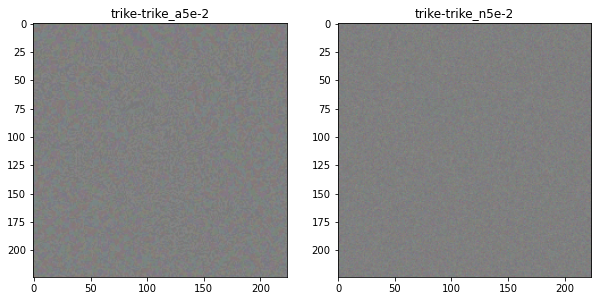

In [15]:
# YOUR CODE HERE
trike = jpg_file_to_mobilenet(filename='trike.jpg',show=False, mode='resize')
trike_a5e = jpg_file_to_mobilenet(filename='trike_a5e-2.jpg',show=False, mode='resize')
trike_n5e = jpg_file_to_mobilenet(filename='trike_n5e-2.jpg',show=False, mode='resize')
di1 = trike-trike_a5e
di2 = trike-trike_n5e


f,a = plt.subplots(1,2,figsize=(10,7))
a[0].imshow(di1[0,:,:,:]*.5+.5)
a[0].set_title('trike-trike_a5e-2')
a[1].imshow(di2[0,:,:,:]*.5+.5)
a[1].set_title('trike-trike_n5e-2')

**Task 3.3**

Calculate the mean for each color channel `m1` and `m2` for both difference images, as well as the standard deviation per color channel `s1` and `s2`. And last but not least the sum of the squares per channel `ssq1` and `ssq2`. 

In [16]:
# YOUR CODE HERE
m1 = tf.reduce_mean(di1,axis=[0,1,2])
m2 = tf.reduce_mean(di2,axis=[0,1,2])
s1 = tf.math.reduce_std(di1,axis=[0,1,2]) 
s2 = tf.math.reduce_std(di2,axis=[0,1,2]) 
ssq1 = tf.math.reduce_sum(tf.math.square(di1),axis=[0,1,2]) 
ssq2 = tf.math.reduce_sum(tf.math.square(di2),axis=[0,1,2]) 

print(m1,s1,ssq1)
print('---')
print(m2,s2,ssq2)

tf.Tensor([-0.00039362  0.00012377 -0.00036581], shape=(3,), dtype=float32) tf.Tensor([0.04156008 0.04028098 0.04233061], shape=(3,), dtype=float32) tf.Tensor([86.67377  81.40936  89.911674], shape=(3,), dtype=float32)
---
tf.Tensor([-2.9740846e-04 -9.1124821e-06 -7.9589937e-04], shape=(3,), dtype=float32) tf.Tensor([0.03723199 0.03721166 0.0373064 ], shape=(3,), dtype=float32) tf.Tensor([69.55872  69.480354 69.865845], shape=(3,), dtype=float32)


**Task 3.4**


Which of the following statements is true?

'a': The pertubations in *trike_a5e-2.jpg* and *trike_n5e-2.jpg* are just random noise.

'b': The pertubations in *trike_a5e-2.jpg* are random noise, but the pertubations in *trike_n5e-2.jpg* are depending on *trike.jpg* and the pre-trained *MobileNetV2*.

'c': The pertubations in *trike_a5e-2.jpg* are depending on *trike.jpg* and the pre-trained *MobileNetV2*, but the pertubations in *trike_n5e-2.jpg* are random noise.

'd': The pertubations in *trike_a5e-2.jpg*  and in *trike_n5e-2.jpg* are depending on *trike.jpg* and the pre-trained *MobileNetV2*.

*Use a variable* `x34` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x34='e'`. *There is only one correct answer.*

In [17]:
# YOUR CODE HERE
x34='c'
print('The answer is ' + x34 + '.')

The answer is c.
